In [3]:
import numpy as np

counts = 0

In [90]:
def traditional_multiply_matrix(A, B):
    result = np.zeros((len(A), len(B)))
    global counts
    s = len(A)

    for i in range(s):
        for j in range(s):
            sum_j = 0
            for k in range(s):

                sum_j += A[i][k] * B[k][j]
                counts += 1

            result[i][j] = sum_j

    return result

In [89]:
def multiply_matrix(A, B, l):
    try:
        if A.shape[1] != B.shape[0]:
            raise ValueError(
                "Liczba kolumn pierwszej macierzy musi być równa liczbie wierszy drugiej macierzy"
            )

        if (
            A.shape[0] < 2**l
            and A.shape[1] < 2**l
            and B.shape[0] < 2**l
            and B.shape[1] < 2**l
        ):
            return traditional_multiply_matrix(A, B)
    except ValueError as e:
        print(f"Błąd: {e}")

In [88]:
def add_matrices(matrix1, matrix2):
    global counts
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        raise ValueError("Matrices must have the same dimensions")

    result = [[0 for _ in range(len(matrix1[0]))] for _ in range(len(matrix1))]

    for i in range(len(matrix1)):
        for j in range(len(matrix1[0])):
            result[i][j] = matrix1[i][j] + matrix2[i][j]
            counts += 1

    return result

In [87]:
def subtract_matrices(matrix1, matrix2):
    global counts
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        raise ValueError("Matrices must have the same dimensions")

    result = [[0 for _ in range(len(matrix1[0]))] for _ in range(len(matrix1))]

    for i in range(len(matrix1)):
        for j in range(len(matrix1[0])):
            result[i][j] = matrix1[i][j] - matrix2[i][j]
            counts += 1

    return result

In [91]:
def split_matrix(matrix):
    n = len(matrix) // 2

    return (
        np.array(matrix)[:n, :n],
        np.array(matrix)[:n, n:],
        np.array(matrix)[n:, :n],
        np.array(matrix)[n:, n:],
    )


def strassen_multiply_matrix(A, B, l):

    if len(A) <= 2**l:

        return traditional_multiply_matrix(A, B)

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    P1 = strassen_multiply_matrix(add_matrices(A11, A22), add_matrices(B11, B22), l)
    P2 = strassen_multiply_matrix(add_matrices(A21, A22), B11, l)
    P3 = strassen_multiply_matrix(A11, subtract_matrices(B12, B22), l)
    P4 = strassen_multiply_matrix(A22, subtract_matrices(B21, B11), l)
    P5 = strassen_multiply_matrix(add_matrices(A11, A12), B22, l)
    P6 = strassen_multiply_matrix(
        subtract_matrices(A21, A11), add_matrices(B11, B12), l
    )
    P7 = strassen_multiply_matrix(
        subtract_matrices(A12, A22), add_matrices(B21, B22), l
    )

    C11 = add_matrices(subtract_matrices(add_matrices(P1, P4), P5), P7)
    C12 = add_matrices(P3, P5)
    C21 = add_matrices(P2, P4)
    C22 = add_matrices(subtract_matrices(add_matrices(P1, P3), P2), P6)

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C

In [106]:
import datetime

l = [7, 5, 3]
for i in l:
    times = []
    for k in range(2, 8):

        start = datetime.datetime.now()
        strassen_multiply_matrix(
            np.random.randint(10, size=(2**k, 2**k)),
            np.random.randint(10, size=(2**k, 2**k)),
            i,
        )

        times.append((datetime.datetime.now() - start).total_seconds())
        with open(f"times{i}.txt", "w+") as f:
            for items in times:
                f.write("%s\n" % items)

In [ ]:
for i in l:
    table = []
    times = []
    for k in range(2, 11):

        counts = 0
        start = datetime.datetime.now()
        strassen_multiply_matrix(
            np.random.randint(10, size=(2**k, 2**k)),
            np.random.randint(10, size=(2**k, 2**k)),
            i,
        )

        times.append((datetime.datetime.now() - start).total_seconds())
        table.append(counts)

        with open(f"counts{i}.txt", "w+") as f:

            for items in table:

                f.write("%s\n" % items)

        with open(f"times{i}.txt", "w+") as f:
            for items in times:
                f.write("%s\n" % items)

[64, 736, 6304, 48736, 359584, 2590816, 18430624, 130194016, 916076704, 6431411296]
[64, 512, 4736, 37760, 282752, 2052992, 14665856, 103840640, 731603072]
[64, 512, 4096, 32768, 247808, 1808384, 12953600, 91854848, 647702528]
[64, 512, 4096, 32768, 262144, 2097152, 14974976, 106004480, 746749952]


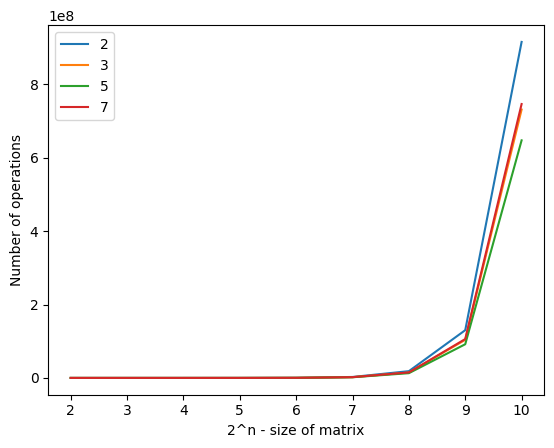

[0.0, 0.002001, 0.009001, 0.043996, 0.34, 2.401998, 15.110001, 123.968045, 738.534117, 4886.993469]
[0.0, 0.001002, 0.003, 0.020001, 0.154051, 1.157002, 8.528035, 59.758047, 422.734156]
[0.0, 0.001002, 0.003032, 0.020992, 0.092995, 0.733002, 5.63103, 37.582043, 266.523081]
[0.0, 0.000995, 0.004002, 0.025999, 0.168997, 1.486997, 5.594002, 39.163306, 265.813613]


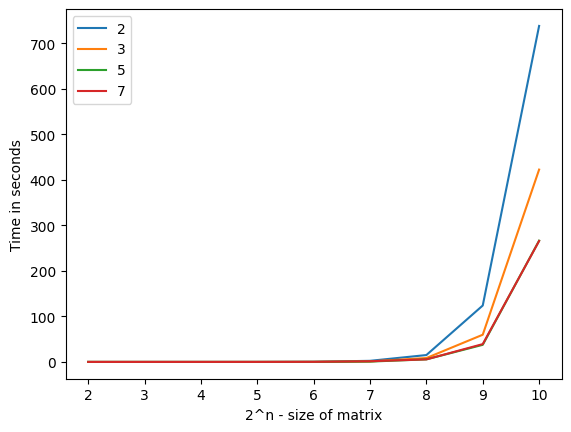

In [116]:
import matplotlib.pyplot as plt


lines = [2, 3, 5, 7]

for i in lines:
    counts = []
    with open(f"counts{i}.txt") as file:
        for line in file:
            counts.append(line)
    counts = [int(i) for i in counts]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], counts[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Number of operations")

    print(counts)
plt.legend(lines)
plt.show()


for i in lines:
    times = []
    with open(f"times{i}.txt") as file:
        for line in file:
            times.append(line)
    times = [float(i) for i in times]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], times[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Time in seconds")

    print(times)
plt.legend(lines)
plt.show()

In [94]:
k = 6
counts = 0

A, B = np.random.randint(10, size=(2**k, 2**k)), np.random.randint(
    10, size=(2**k, 2**k)
)


print(
    traditional_multiply_matrix(
        A,
        B,
    )
)
print(counts)
counts = 0

print(
    strassen_multiply_matrix(
        A,
        B,
        4,
    )
)
print(counts)

[[1384. 1391. 1317. ... 1435. 1351. 1404.]
 [1294. 1266. 1225. ... 1393. 1305. 1382.]
 [1134. 1017. 1317. ... 1263. 1132. 1446.]
 ...
 [1172. 1094. 1195. ... 1164. 1148. 1311.]
 [1343. 1394. 1233. ... 1404. 1163. 1356.]
 [1406. 1348. 1429. ... 1397. 1501. 1517.]]
262144
[[1384. 1391. 1317. ... 1435. 1351. 1404.]
 [1294. 1266. 1225. ... 1393. 1305. 1382.]
 [1134. 1017. 1317. ... 1263. 1132. 1446.]
 ...
 [1172. 1094. 1195. ... 1164. 1148. 1311.]
 [1343. 1394. 1233. ... 1404. 1163. 1356.]
 [1406. 1348. 1429. ... 1397. 1501. 1517.]]
251392


## Tests


In [81]:
A = np.array([[1, 3], [2, 2]])
A

array([[1, 3],
       [2, 2]])

In [82]:
B = np.array([[2, 2], [6, 3]])
B

array([[2, 2],
       [6, 3]])

In [ ]:
counts = 0
print(traditional_multiply_matrix(A, B))
print(counts)
counts = 0


print(strassen_multiply_matrix(A, B))
print(counts)

[[20. 11.]
 [16. 10.]]
8
[[20. 11.]
 [16. 10.]]
8


In [19]:
multiply_matrix(A, B, 2)

array([[20., 11.],
       [16., 10.]])

In [ ]:
C = np.array([[1, 2]])
C

array([[1, 2]])

In [ ]:
multiply_matrix(A, C, 2)

Błąd: Liczba kolumn pierwszej macierzy musi być równa liczbie wierszy drugiej macierzy


[64, 512, 4736, 37760, 282752, 2052992, 14665856, 103840640, 731603072]
[64, 512, 4096, 32768, 247808, 1808384, 12953600, 91854848, 647702528]
[64, 512, 4096, 32768, 262144, 2097152, 14974976, 106004480, 746749952]


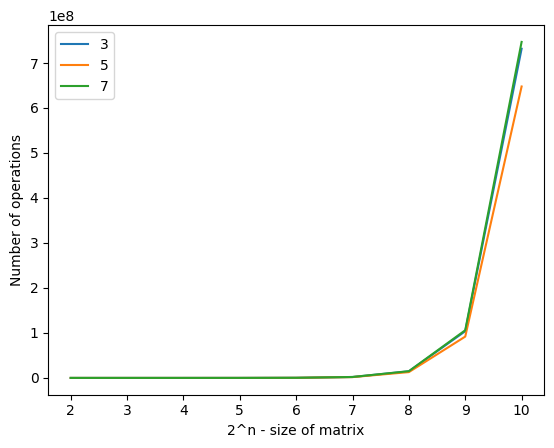

[0.0, 0.001002, 0.003, 0.020001, 0.154051, 1.157002, 8.528035, 59.758047, 422.734156]
[0.0, 0.001002, 0.003032, 0.020992, 0.092995, 0.733002, 5.63103, 37.582043, 266.523081]
[0.0, 0.000995, 0.004002, 0.025999, 0.168997, 1.486997, 5.594002, 39.163306, 265.813613]


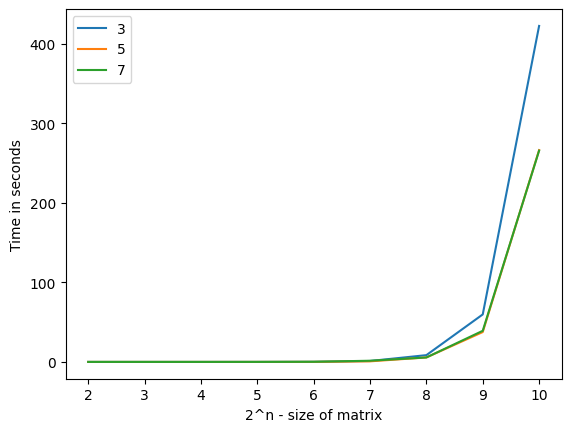

[64, 512, 4096, 32768, 247808, 1808384, 12953600, 91854848, 647702528]
[64, 512, 4096, 32768, 262144, 2097152, 14974976, 106004480, 746749952]


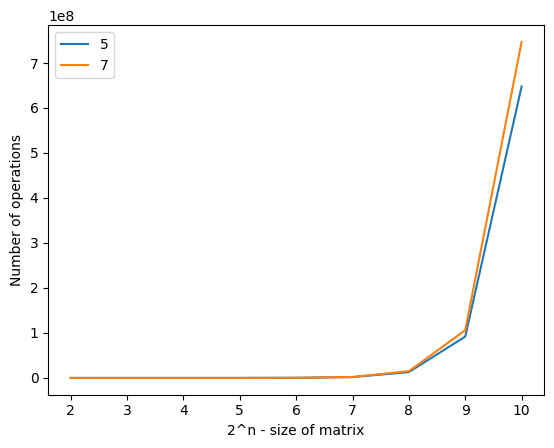

[0.0, 0.001002, 0.003032, 0.020992, 0.092995, 0.733002, 5.63103, 37.582043, 266.523081]
[0.0, 0.000995, 0.004002, 0.025999, 0.168997, 1.486997, 5.594002, 39.163306, 265.813613]


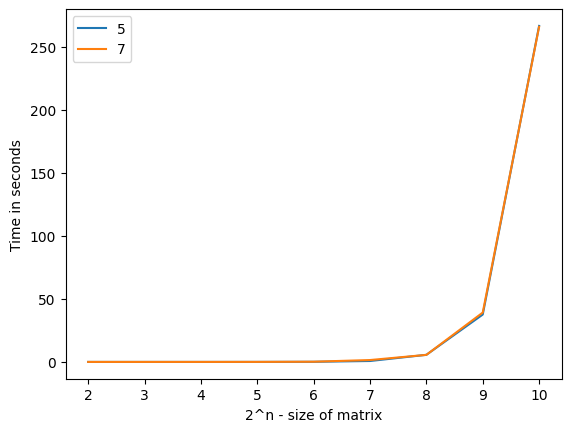

[64, 512, 4736, 37760, 282752, 2052992, 14665856, 103840640, 731603072]
[64, 512, 4096, 32768, 262144, 2097152, 14974976, 106004480, 746749952]


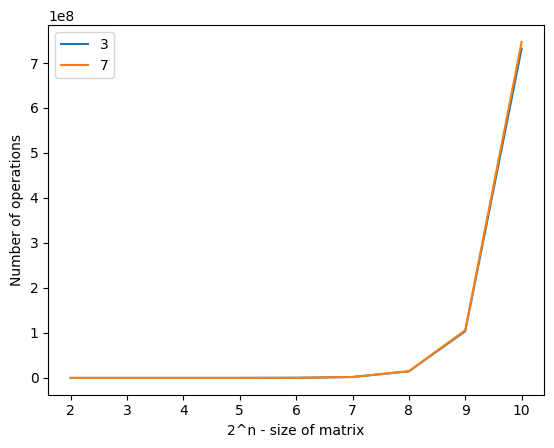

[0.0, 0.001002, 0.003, 0.020001, 0.154051, 1.157002, 8.528035, 59.758047, 422.734156]
[0.0, 0.000995, 0.004002, 0.025999, 0.168997, 1.486997, 5.594002, 39.163306, 265.813613]


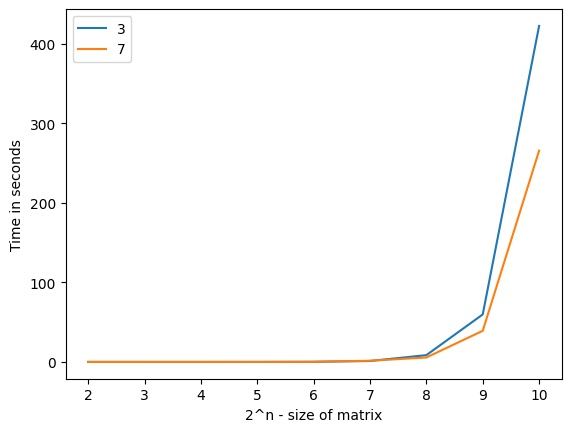

In [3]:
import matplotlib.pyplot as plt


lines = [3, 5, 7]

for i in lines:
    counts = []
    with open(f"counts{i}.txt") as file:
        for line in file:
            counts.append(line)
    counts = [int(i) for i in counts]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], counts[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Number of operations")

    print(counts)
plt.legend(lines)
plt.show()


for i in lines:
    times = []
    with open(f"times{i}.txt") as file:
        for line in file:
            times.append(line)
    times = [float(i) for i in times]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], times[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Time in seconds")

    print(times)
plt.legend(lines)
plt.show()


lines = [5, 7]

for i in lines:
    counts = []
    with open(f"counts{i}.txt") as file:
        for line in file:
            counts.append(line)
    counts = [int(i) for i in counts]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], counts[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Number of operations")

    print(counts)
plt.legend(lines)
plt.show()


for i in lines:
    times = []
    with open(f"times{i}.txt") as file:
        for line in file:
            times.append(line)
    times = [float(i) for i in times]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], times[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Time in seconds")

    print(times)
plt.legend(lines)
plt.show()


lines = [3, 7]

for i in lines:
    counts = []
    with open(f"counts{i}.txt") as file:
        for line in file:
            counts.append(line)
    counts = [int(i) for i in counts]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], counts[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Number of operations")

    print(counts)
plt.legend(lines)
plt.show()


for i in lines:
    times = []
    with open(f"times{i}.txt") as file:
        for line in file:
            times.append(line)
    times = [float(i) for i in times]
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], times[:9])
    plt.xlabel("2^n - size of matrix")
    plt.ylabel("Time in seconds")

    print(times)
plt.legend(lines)
plt.show()